# Simulation - Sparsity in High Dimensions

Number of samples M = 500



In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt


m = 500
n = [1, 2, 5, 10, 20, 50, 100]
MeanNNDistance = []

for dim in n:
    # Creates a tensor of (m x ni)
    Dataset = torch.rand(m, dim)

    # (1 x m x n) - (m x 1 x n) broadcasting will make it (m x m x n)
    diffs = Dataset[:, None, :] - Dataset[None, :, :]

    # Calculate squared euclidean distance
    EucDist = torch.sum(diffs**2, axis=2)

    # Gets smallest 2 euclidean distances for each point
    top2_values, top2_indices = torch.topk(EucDist, k=2, dim=1, largest=False)

    # Calculates Average mean nearest neighbor distance
    MeanNNDistance.append(torch.sum(top2_values) / dim)


[tensor(0.0011), tensor(0.1699), tensor(4.6875), tensor(15.4529), tensor(30.0618), tensor(47.7726), tensor(56.7310)]


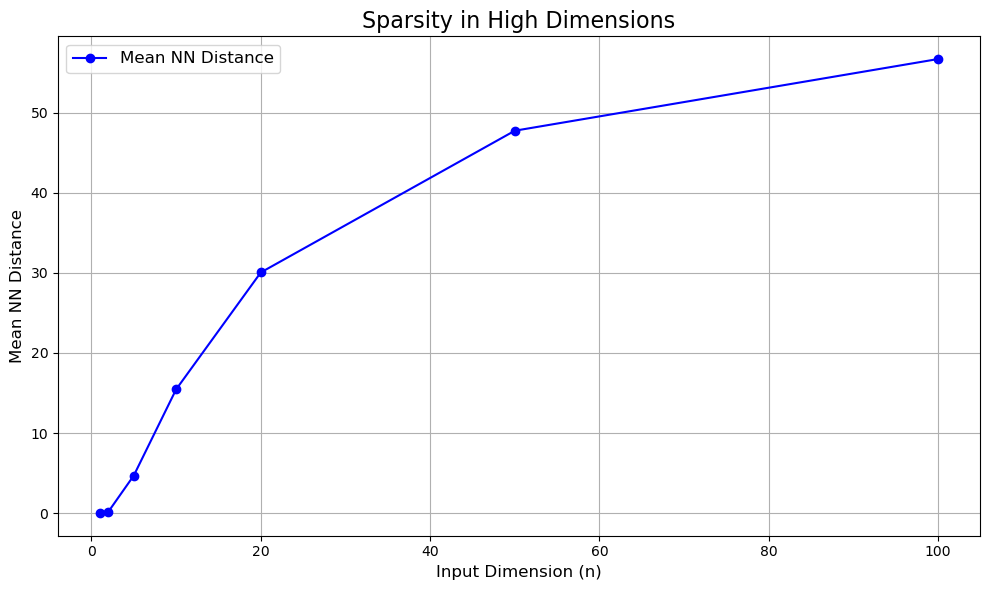

In [6]:
print(MeanNNDistance)

xpoints = n
ypoints = MeanNNDistance
 
plt.figure(figsize=(10, 6))

plt.plot(xpoints, ypoints, marker='o', linestyle='-', color='b', label='Mean NN Distance')
plt.title('Sparsity in High Dimensions', fontsize=16)
plt.xlabel('Input Dimension (n)', fontsize=12)
plt.ylabel('Mean NN Distance', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)

plt.tight_layout()


plt.show()